# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as smf
import statsmodels.formula.api as sm

# # Step 1


# Importing data

In [2]:
data = pd.read_csv('Salary_Data (1).csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.shape

(30, 2)

In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

# # Step 2


# Performing EDA On Data

# Checking Data Type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for Null Values

In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Checking for Duplicate Values

In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data[data.duplicated()]

,YearsExperience,Salary


# # Step 3


# Plotting the data to check for outliers

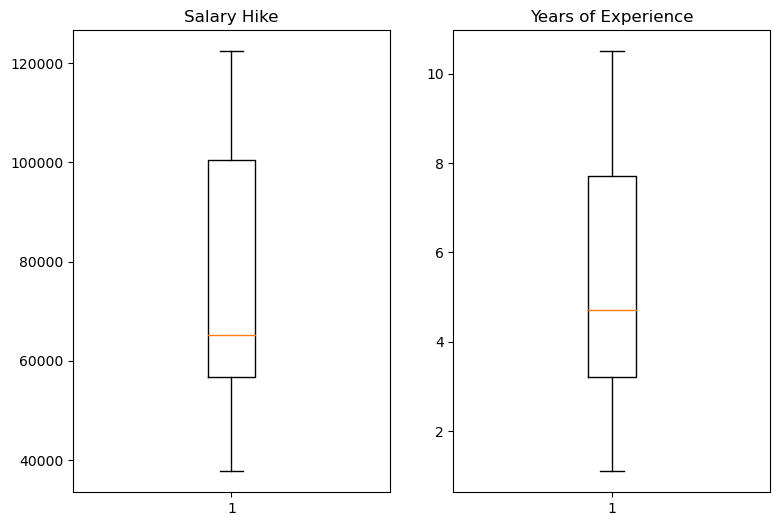

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()


# As we can see there are no Outliers in the data



# #Step 4


# Checking for the Correlation between variables

In [12]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization of Correlation beteen x and y


# regplot = regression plot

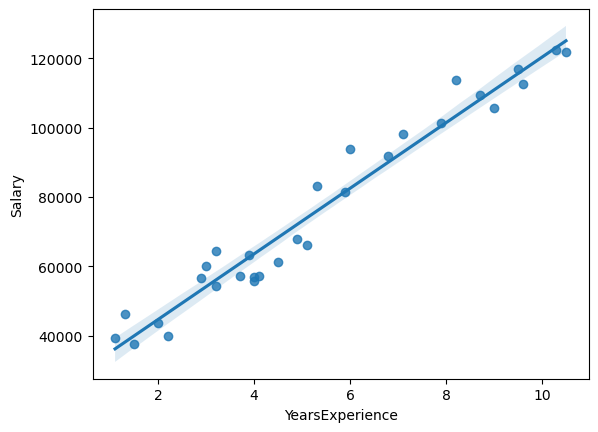

In [13]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])  
plt.show()

# As you can see above
- There is good correlation between the two variable.
- The score is more than 0.8 which is a good sign


# # Step 5

# Checking for Homoscedasticity or Hetroscedasticity

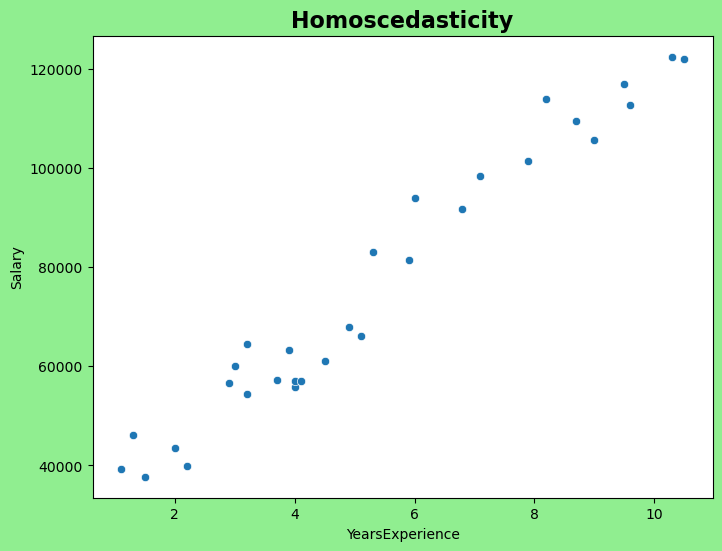

In [14]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()


# As we can see in the above graph

- It shows as the Salary Increases the Years of Experience increases variation is constant along the way in data

- The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [15]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# #Step 6


  # Feature Engineering
  
# Trying different transformation of data to estimate normal distribution and remove any skewness


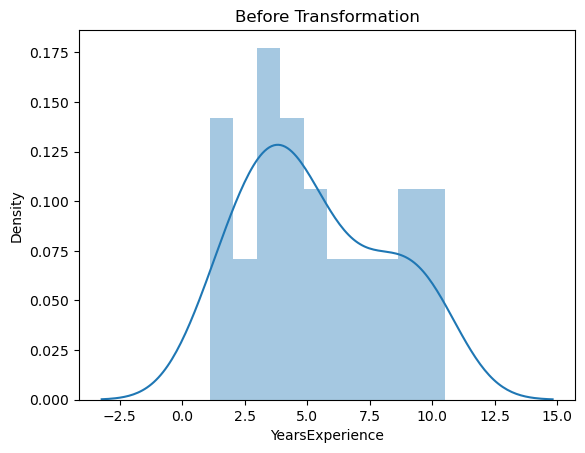

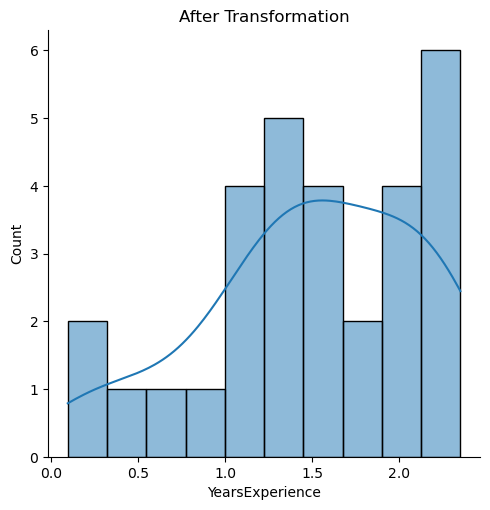

In [17]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()
import warnings
warnings.filterwarnings('ignore')

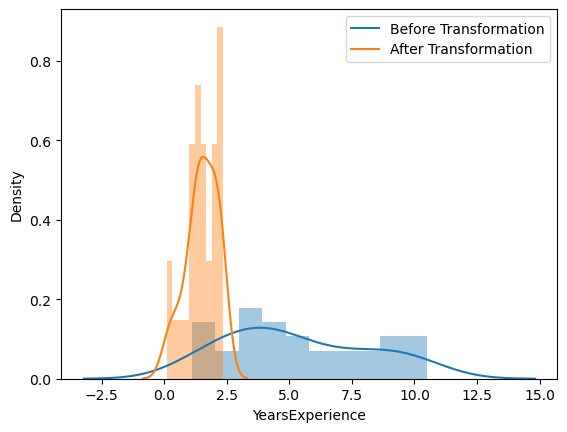

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

# As we can see

- How log transformation affects the data and it scales the values down.

- Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)


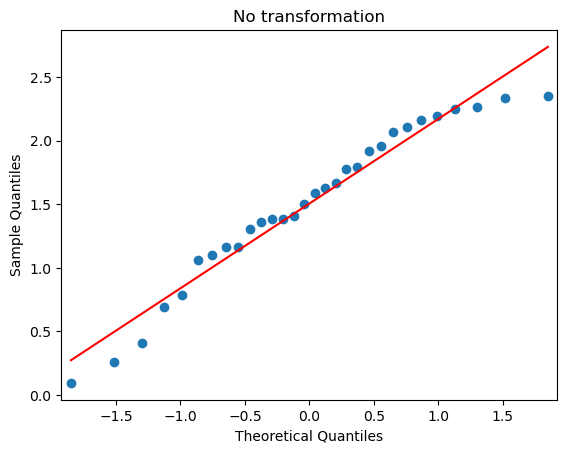

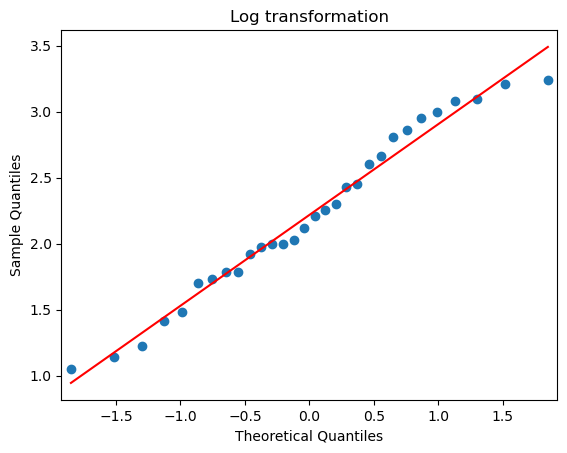

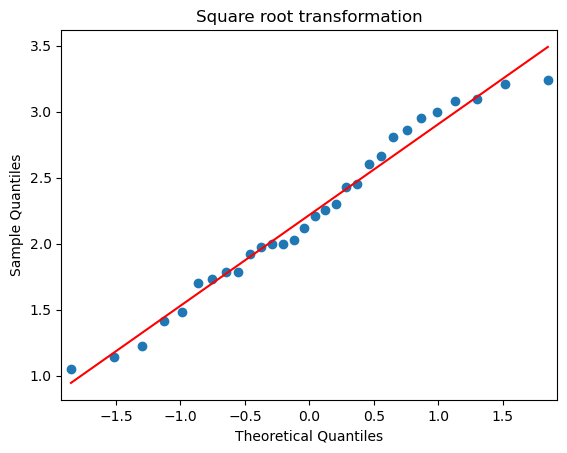

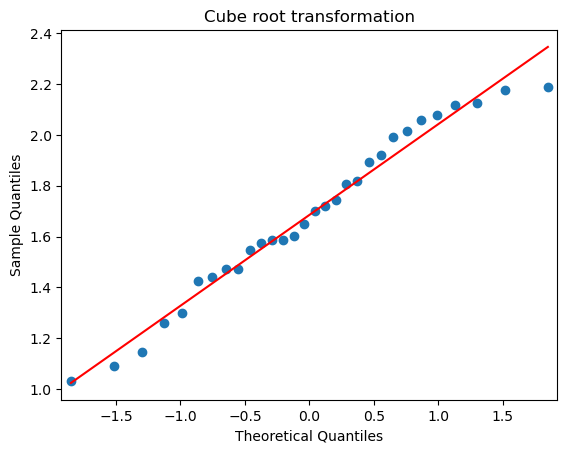

In [19]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()


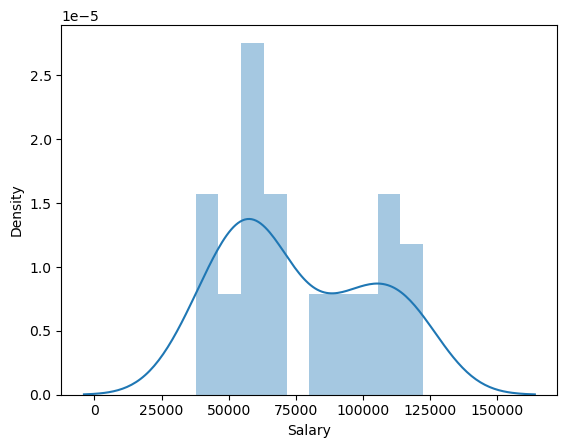

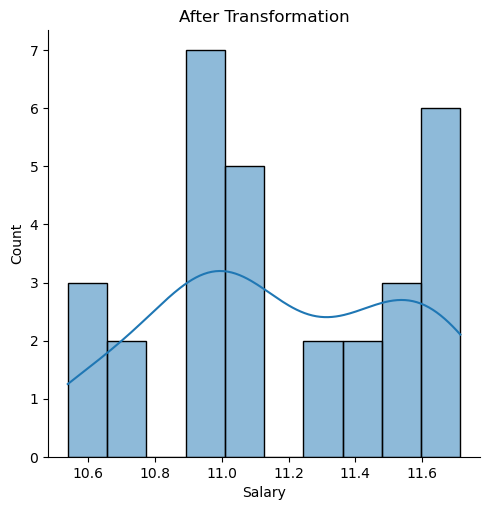

In [20]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()


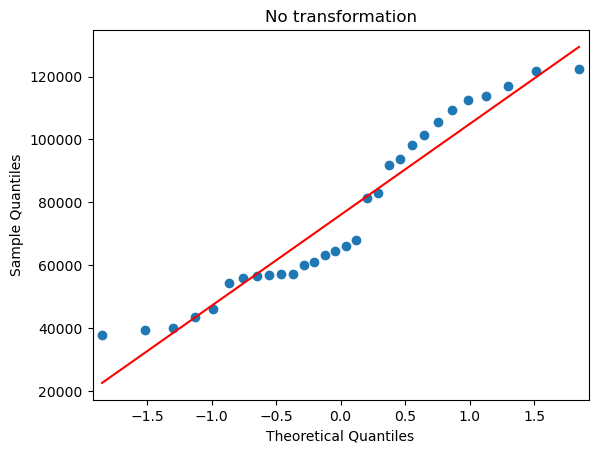

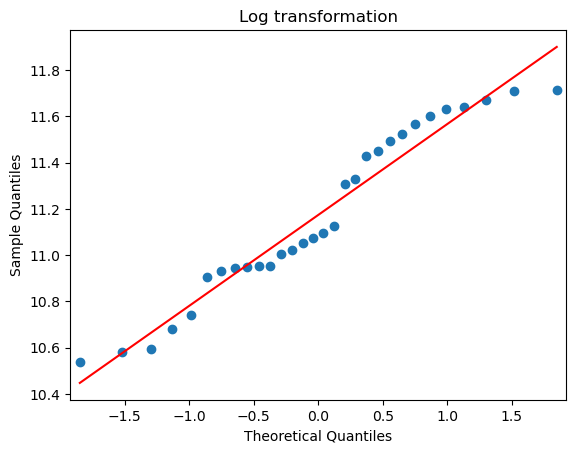

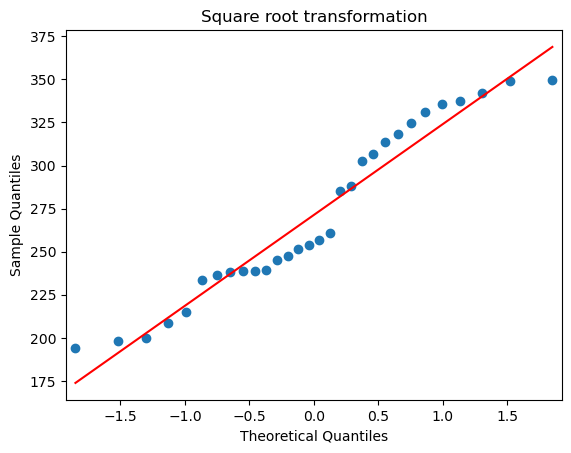

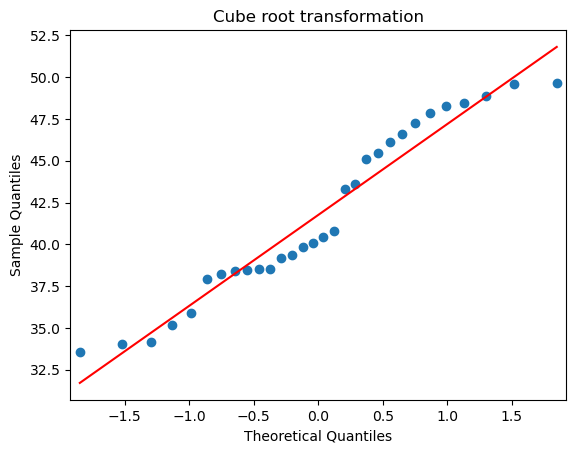

In [21]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Important Note:
    
- We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)


# #Step 7

- Fitting a Linear Regression Model

-  Using Ordinary least squares (OLS) regression

- It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line


In [22]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        21:27:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As we can notice in the above model

- The R-squared and Adjusted R-squared scores are above 0.85.
- (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
- F-statitics is quite high as well and yes desire it to be higher
- But log-likelihood is quite very low far away from 0
- and AIC and BIC score are much higher for this model
- Lets Try some data transformation to check whether these scores can get any better than this.

# Square Root transformation on data


In [23]:

model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                        21:27:02   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As we can notice in the above model
- The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
- (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
- F-statitics has gotten a little lower for this model than previous.
- But log-likelihood got better than before close to 0 higher than previous model
- and AIC and BIC score are now much better for this model
- Lets Try some data transformation to check whether these scores can get any better than this.

# Cuberoot transformation on Data


In [24]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                        21:27:04   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data


In [25]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        21:27:05   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

# As Y = Beta0 + Beta1*(X)

# Finding Coefficient Parameters (Beta0 and Beta1 values)

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

- Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96

- Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

- Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [27]:
print(model.tvalues,'\n',model.pvalues)


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64



- (Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
    
- (daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20
    
- As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.

- R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

- Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [28]:
model.rsquared,model.rsquared_adj


(0.9569566641435086, 0.9554194021486339)

# Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%



# #Step 8

- Residual Analysis

- Test for Normality of Residuals (Q-Q Plot)

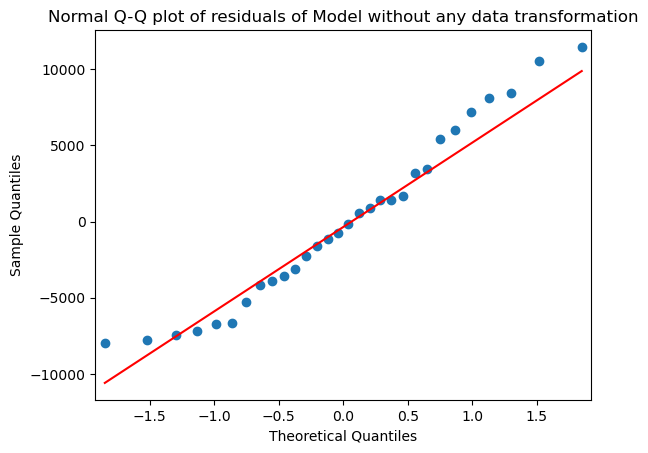

In [29]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

# As we can notice in the above plot

- The first model follows normal distribution


# Residual Plot to check Homoscedasticity or Hetroscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

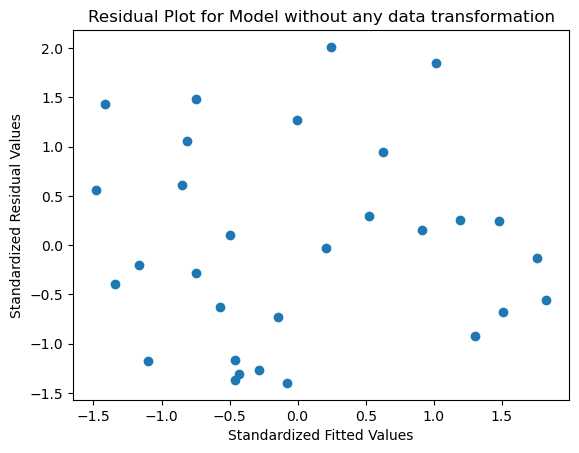

In [31]:

plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# As we can notice in the above plots

- The Model have Homoscedasciticity.

- The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.

- Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed



# #Step 9

- Model Validation

- We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

- Comparing different models with respect to the Root Mean Squared Errors


In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
model1_pred_y =np.square(model1.predict(data['YearsExperience']))
model2_pred_y =pow(model2.predict(data['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data['YearsExperience']))

In [34]:
model1_rmse =np.sqrt(mean_squared_error(data['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174311 
model2= 6232.81545583586 
model3= 7219.716974372791


In [35]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

# As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

-  Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

# #Step 10

# Predicting values

In [36]:
# first model results without any transformation
predict = pd.DataFrame()
predict['YearsExperience'] = data.YearsExperience
predict['Salary'] = data.Salary
predict['Predicte_Salary_Hike'] = pd.DataFrame(model.predict(predict.YearsExperience))
predict

,YearsExperience,Salary,Predicte_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
